# Описание проекта

Интернет-магазину "Стримчик", продающему компьютерные игры по всему миру, требуется сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017й год по данным о продажах игр, оценках пользователей и экспертов, жанрах и платформах за 2016й год. Нужно выявить определяющие успешность игры закономерности.

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**Содержание**
* [Шаг 1. Общая информация о данных](#step1)
* [Шаг 2. Подготовка данных](#step2)
* [Шаг 3. Исследовательский анализ данных](#step3)
* [Шаг 4. Портрет пользователя каждого региона](#step4)
* [Шаг 5. Проверка гипотез](#step5)
* [Шаг 6. Общий вывод](#step6)

### Шаг 1. Общая информация о данных<a id='step1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
# Чтение данных из файла
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv(r'games.csv')

In [3]:
# Отображение данных
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
# Общая информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


##### Вывод

Пропуски в колонке `Critic_Score` встречаются в 49% записей, в колонках `User_Score` и `Rating` пропуски встречаются в 60% записей. Также есть небольшое количество пропусков в колонке `Year_of_release` (1.6%) и всего 2 пропуска в столбце `Name`

### Шаг 2. Подготовка данных<a id='step2'></a>

#### 2.1 Приведение названий столбцов к нижнему регистру

In [5]:
data.columns = [col_name.lower() for col_name in data.columns]

#### 2.2 Преобразование данных в нужные типы

##### Обработка столбца "user_score"

In [6]:
# Поиск нечисловых строковых данных в столбце "user_score"
L = []
for x in data[data['user_score'].notna()]['user_score'].unique():
    for part_x in x.split('.'):
        if not part_x.isnumeric():
            L.append(x)
            break

# Отображение найденных значений
L

['tbd']

In [7]:
# Оценка доли записей, содержащих в столбце "user_score" значение 'tbd' 
len(data[data['user_score'] == 'tbd']) / len(data)

0.1450194436135208

In [8]:
# Аббревиатура 'TBD' расшифровывается как 'To Be Determined' (будет определено в будущем),
# это означает, что на момент выгрузки данных информация о пользовательском рейтинге отсутствовала,
# можно заменить данное значение на NaN
data['user_score'] = data['user_score'].where(data['user_score'] != 'tbd', np.NaN)

In [9]:
# Приведение к типу "float"
data['user_score'] = data['user_score'].astype('float64')

#### 2.3 Обработка пропусков

##### Обработка пропусков в столбце "name"

In [10]:
# Отобразим данные об играх с отстутствующим названием
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
# Игры с отстутствующими названиями являются довольно старыми (1993г.),
# не содержат информации о рейтинге и об оценках, за их малостью их можно удалить
data = data.dropna(subset=['name']).reset_index(drop=True)

##### Обработка пропусков в столбце "year_of_release"

In [12]:
# Создадим список имен игр с отсутствующим годом выпуска
missing_year_games = data.query('year_of_release.isna()').pivot_table(index='name').index

In [13]:
# Осуществим поиск совпадающих имен игр для других платформ или игры с указанным годом выпуска в имени
(data
    .query('name.isin(@missing_year_games)')[['name', 'year_of_release', 'platform']]
    .sort_values(by='name')
    .iloc[450:480]
)

,name,year_of_release,platform
9826,WRC: FIA World Rally Championship,NaN,X360
16178,WRC: FIA World Rally Championship,NaN,PC
2772,WarioWare: Twisted!,NaN,GBA
3277,Wet,2009.0,PS3
3996,Wet,NaN,X360
1576,Wheel of Fortune,1998.0,PS
4661,Wheel of Fortune,2010.0,DS
6669,Wheel of Fortune,1997.0,N64
2123,Wheel of Fortune,2010.0,Wii
2156,Wheel of Fortune,NaN,PS2


In [14]:
data.loc[16291, 'year_of_release'] = 2011
data.loc[5654, 'year_of_release'] = 2005
data.loc[8917, 'year_of_release'] = 2005
data.loc[16155, 'year_of_release'] = 2003
data.loc[13608, 'year_of_release'] = 2011
data.loc[14744, 'year_of_release'] = 2011
data.loc[9217, 'year_of_release'] = 2010
data.loc[5442, 'year_of_release'] = 2010
data.loc[9042, 'year_of_release'] = 2010
data.loc[6817, 'year_of_release'] = 2010
data.loc[16327, 'year_of_release'] = 2012
data.loc[15673, 'year_of_release'] = 2006
data.loc[718, 'year_of_release'] = 2006
data.loc[1130, 'year_of_release'] = 2010
data.loc[12895, 'year_of_release'] = 2011
data.loc[13059, 'year_of_release'] = 2011
data.loc[6623, 'year_of_release'] = 2006
data.loc[5491, 'year_of_release'] = 2004
data.loc[16057, 'year_of_release'] = 2011
data.loc[6898, 'year_of_release'] = 2013
data.loc[11953, 'year_of_release'] = 2013
data.loc[7723, 'year_of_release'] = 2013
data.loc[3703, 'year_of_release'] = 2004
data.loc[15964, 'year_of_release'] = 2003
data.loc[10464, 'year_of_release'] = 2006
data.loc[9292, 'year_of_release'] = 2006
data.loc[377, 'year_of_release'] = 2003
data.loc[5587, 'year_of_release'] = 2006
data.loc[16403, 'year_of_release'] = 2003
data.loc[13780, 'year_of_release'] = 2008
data.loc[13141, 'year_of_release'] = 2008
data.loc[11549, 'year_of_release'] = 2010
data.loc[9829, 'year_of_release'] = 2002
data.loc[6341, 'year_of_release'] = 2005
data.loc[10316, 'year_of_release'] = 2011
data.loc[11621, 'year_of_release'] = 2011
data.loc[10685, 'year_of_release'] = 2011
data.loc[10789, 'year_of_release'] = 2011
data.loc[5873, 'year_of_release'] = 2010
data.loc[1698, 'year_of_release'] = 2003
data.loc[16446, 'year_of_release'] = 2012
data.loc[6635, 'year_of_release'] = 2011
data.loc[456, 'year_of_release'] = 2008
data.loc[1537, 'year_of_release'] = 2008
data.loc[7209, 'year_of_release'] = 2012
data.loc[2272, 'year_of_release'] = 2012
data.loc[2131, 'year_of_release'] = 2012
data.loc[3080, 'year_of_release'] = 2012
data.loc[4817, 'year_of_release'] = 2012
data.loc[1608, 'year_of_release'] = 2012
data.loc[6475, 'year_of_release'] = 2012
data.loc[677, 'year_of_release'] = 2008
data.loc[13873, 'year_of_release'] = 2007
data.loc[2491, 'year_of_release'] = 2002
data.loc[3412, 'year_of_release'] = 2005
data.loc[2478, 'year_of_release'] = 2006
data.loc[2848, 'year_of_release'] = 2010
data.loc[3485, 'year_of_release'] = 2001
data.loc[183, 'year_of_release'] = 2003
data.loc[14367, 'year_of_release'] = 2009
data.loc[9875, 'year_of_release'] = 2006
data.loc[14140, 'year_of_release'] = 2008
data.loc[15336, 'year_of_release'] = 2012
data.loc[6772, 'year_of_release'] = 2006
data.loc[3222, 'year_of_release'] = 2002
data.loc[13316, 'year_of_release'] = 2010
data.loc[1649, 'year_of_release'] = 2002
data.loc[3458, 'year_of_release'] = 2002
data.loc[5888, 'year_of_release'] = 2002
data.loc[5155, 'year_of_release'] = 2002
data.loc[8196, 'year_of_release'] = 2002
data.loc[3738, 'year_of_release'] = 2003
data.loc[4774, 'year_of_release'] = 2002
data.loc[13791, 'year_of_release'] = 2003
data.loc[2280, 'year_of_release'] = 2001
data.loc[12234, 'year_of_release'] = 2011
data.loc[6018, 'year_of_release'] = 2006
data.loc[16371, 'year_of_release'] = 2008
data.loc[15951, 'year_of_release'] = 2008
data.loc[2571, 'year_of_release'] = 2008
data.loc[6198, 'year_of_release'] = 2001
data.loc[9702, 'year_of_release'] = 2010
data.loc[2360, 'year_of_release'] = 2008
data.loc[7366, 'year_of_release'] = 2002
data.loc[6355, 'year_of_release'] = 2008
data.loc[11564, 'year_of_release'] = 2008
data.loc[9705, 'year_of_release'] = 2011
data.loc[13563, 'year_of_release'] = 2003
data.loc[15533, 'year_of_release'] = 2009
data.loc[11015, 'year_of_release'] = 2008
data.loc[13928, 'year_of_release'] = 2006
data.loc[2535, 'year_of_release'] = 2008
data.loc[5931, 'year_of_release'] = 2007
data.loc[6860, 'year_of_release'] = 2010
data.loc[5623, 'year_of_release'] = 2010
data.loc[8499, 'year_of_release'] = 2010
data.loc[10049, 'year_of_release'] = 2007
data.loc[8022, 'year_of_release'] = 2006
data.loc[9484, 'year_of_release'] = 2009
data.loc[13646, 'year_of_release'] = 2010
data.loc[2452, 'year_of_release'] = 2011
data.loc[2521, 'year_of_release'] = 2011
data.loc[4204, 'year_of_release'] = 2006
data.loc[5335, 'year_of_release'] = 2013
data.loc[13194, 'year_of_release'] = 2011
data.loc[5325, 'year_of_release'] = 2011
data.loc[14683, 'year_of_release'] = 2014

In [15]:
# Оценим долю игр с отсутствующим годом выпуска
len(data[data['year_of_release'].isna()]) / len(data)

0.009693053311793215

In [16]:
# Данные о видеоиграх с отстутвующим названием, можно удалить за их молостью (0.9%)
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

In [17]:
# Преобразование оставшихся значений в столбце "year_of_release" к целочисленному типу
data['year_of_release'] = data['year_of_release'].astype('int64')

##### Обработка пропусков в столбце "rating"

In [18]:
# Заменим пропуски в категориальном столбце "rating" на "unknown"
data['rating'] = data['rating'].fillna('unknown')

**Пропуски в столбцах "critic_score", "user_score" и можно объяснить либо ошибками при выгрузке данных, либо фактическим отсутствием значений, обработке данные пропуски не подлежат (например, замена нулями или средними значениями), так как можно исказить результаты анализа**

#### 2.4 Подсчет суммарных продаж

In [19]:
# Суммарные продажи по всем регионам сохраним в столбец "total_sales"
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### Шаг 3. Исследовательский анализ данных<a id='step3'></a>

Text(0, 0.5, 'Игры, шт.')

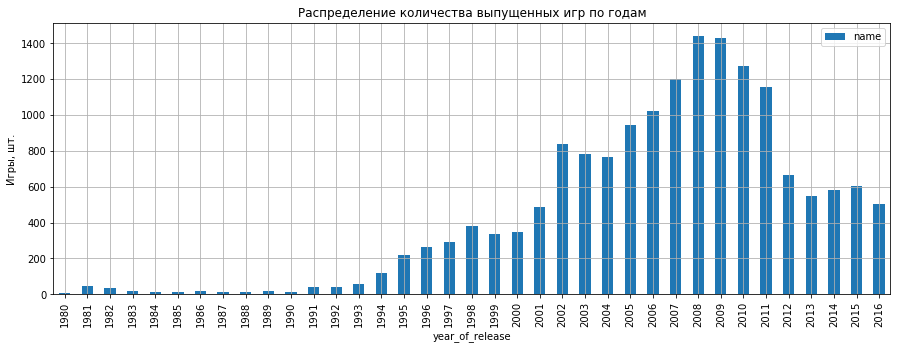

In [20]:
(data
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', figsize=(15, 5), grid=True, title='Распределение количества выпущенных игр по годам')
)
plt.ylabel('Игры, шт.')

In [21]:
overall_sales = (data
                    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                    .sort_values(by='total_sales', ascending=False)
)

Text(0, 0.5, 'Проданные копии, млн.')

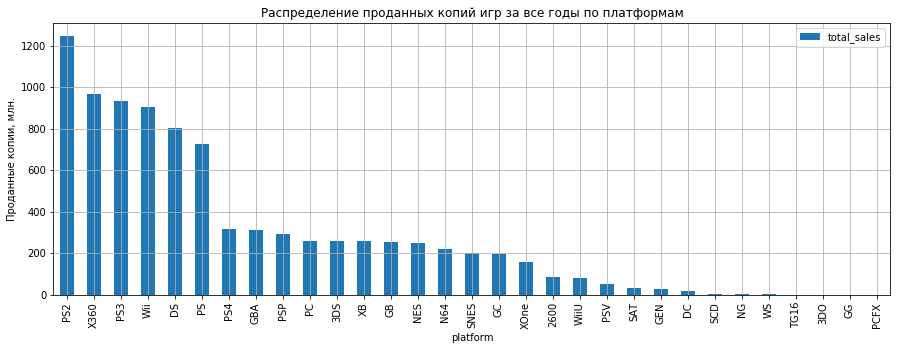

In [22]:
(overall_sales
        .plot(kind='bar', figsize=(15, 5), grid=True, title='Распределение проданных копий игр за все годы по платформам')
)
plt.ylabel('Проданные копии, млн.')

Text(0, 0.5, 'Проданные копии, млн.')

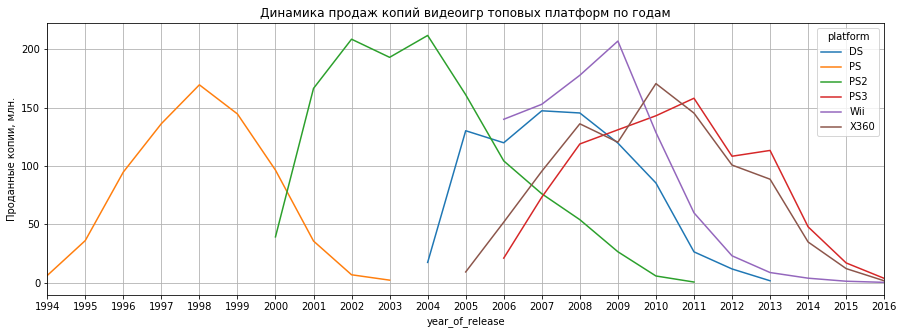

In [23]:
(data
    .query('platform.isin(@overall_sales.head(6).index)')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(xlim=(1994, 2016), xticks=range(1994, 2017), figsize=(15, 5), grid=True, title='Динамика продаж копий видеоигр топовых платформ по годам')
)
plt.ylabel('Проданные копии, млн.')

In [24]:
# Оценим год выпуска первой и последней игры по кадой платформе
temp_df = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])

In [25]:
temp_df.columns = ['min', 'max']

In [26]:
# Вычислим время жизни каждой платформы и запишем результат в столбец life_time
temp_df['life_time'] = temp_df['max'] - temp_df['min']

In [27]:
# Вычислим медианное значение времени жизни платформ
temp_df['life_time'].median()

7.0

##### Вывод

Анализ данных о распределении выпуска видеоигр по годам и данных о динамике продаж копий видеоигр топовых платформ по годам позволяет установить:
- **характерный срок** возникновения новых и исчезновения старых платформ: 7 лет;
- **актуальный период** для проведения исследования: возьмём половину от срока жизни платформы до текущего года - 2013-2016гг.;


In [28]:
# Таблица с данными за актуальный период
actual_data = data.query('year_of_release >= 2013').reset_index()

**Лидирующие по продажам платформы**

In [29]:
actual_overall_sales = (actual_data
                            .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                            .sort_values(by='total_sales', ascending=False)
                        )
actual_overall_sales

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.83
WiiU,64.63
PC,40.06
PSV,32.99
Wii,13.66


In [30]:
list(actual_overall_sales.head(8).index)

['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV']

**Платформы с падающими и с увеличивающимися продажами**

In [31]:
(actual_data
            .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
            #.loc[2014:2015]
)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,13.01,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.77,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


##### Вывод

**Платформы с падающими продажами**: 3DS, PC, PS3, PSP, PSV, Wii, WiiU, X360;

**Платформы с увеличивающимися продажами**: PS4, XOne 

К потенциально прибыльным платформам можно отнести PS4, XOne, 3DC (несмотря на нисходящий тренд, продажи остаются высокими), а также PC (в силу неисчерпаемых возможностей для обновления оборудования).

**График «ящик с усами» по глобальным продажам игр в разбивке по платформам**

In [32]:
# Выделим актуальные платформы
actual_platforms = ['PS4', 'XOne', '3DS', 'PC']

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 2)

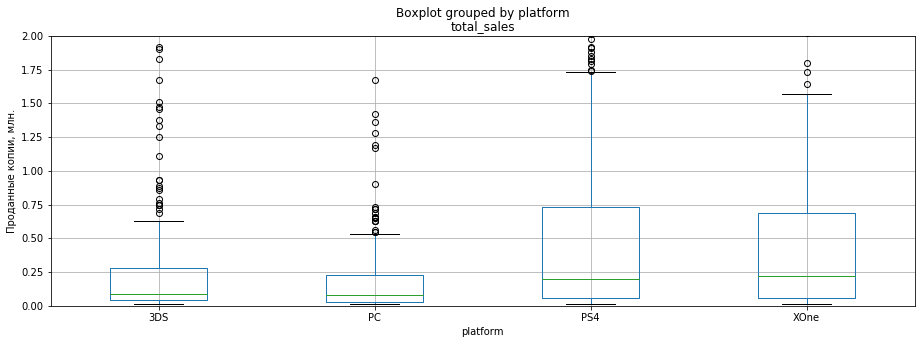

In [33]:
# Построим ящик с усами по перспективным платформам
(actual_data
     .query('platform.isin(@actual_platforms)')
     .boxplot(column='total_sales', by='platform', figsize=(15, 5))
)
plt.ylabel('Проданные копии, млн.')
plt.ylim(0, 2)

In [34]:
# Создадим таблицу с данными о средней и медиане числа проданных копий по перспективным платформам
temp_df = (actual_data
               .query('platform.isin(@actual_platforms)')
               .pivot_table(index='platform', values='total_sales', aggfunc=['median', 'mean', 'count'])
          )

In [35]:
temp_df.columns = ['median', 'mean', 'count']

In [36]:
# Оценим различия средней и медианы
temp_df

,median,mean,count
platform,,,
3DS,0.09,0.472772,303
PC,0.08,0.208646,192
PS4,0.20,0.801378,392
XOne,0.22,0.645020,247


In [37]:
# Оценим средние значения медианы и среднего по всем платформам
temp_df[['median', 'mean']].mean()

median    0.147500
mean      0.531954
dtype: float64

##### Вывод

У всех перспективных платформ медианное значение проданных копий видеоигр в несколько раз меньше среднего значения, это говорит о том, большинство выпускаемых игр продаются относительно небольшим тиражом (распределения скошены вправо), а повышенные значения средних проданных копий обеспечиваются отдельными популярными видеоиграми. При этом медианные значения продаваемых копий платформ PS4 и XOne вдвое выше показателей платформ 3DS и PC.

**Оценка влияния на продажи внутри одной популярной платформы (PS4) отзывов пользователей и критиков**

In [38]:
ps4_data = actual_data.query('platform == "PS4"').reset_index()

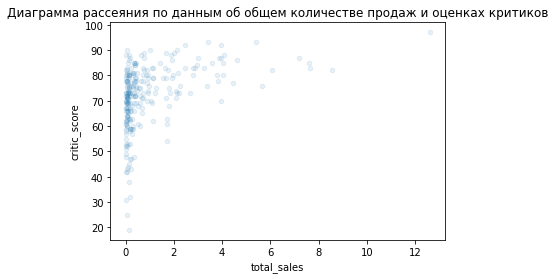

In [39]:
# Построение диаграммы рассеяния по данным об общем количестве продаж и оценках критиков
ps4_data.plot(kind='scatter', x='total_sales', y='critic_score', alpha=0.1, title='Диаграмма рассеяния по данным об общем количестве продаж и оценках критиков')

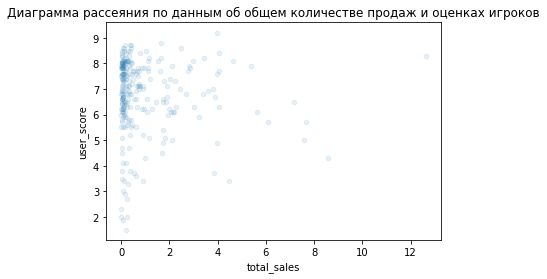

In [40]:
# Построение диаграммы рассеяния по данным об общем количестве продаж и оценках игроков
ps4_data.plot(kind='scatter', x='total_sales', y='user_score', alpha=0.1, title='Диаграмма рассеяния по данным об общем количестве продаж и оценках игроков')

In [41]:
# Оценим медианные значения оценок критиков и пользователей
ps4_data.pivot_table(index='platform', values=['critic_score', 'user_score'], aggfunc='median')

,critic_score,user_score
platform,,
PS4,73.0,7.0


##### Вывод

Из приведенных диаграмм рассеяния видно, что пользователи в отличие от критиков иногда ставят пониженные оценки играм, вышедшим большим тиражом

In [42]:
# Оценка корреляции между количеством проданных копий и оценками критиков
ps4_data['total_sales'].corr(ps4_data['critic_score'])

0.406567902061781

In [43]:
# Оценка корреляции между количеством проданных копий и оценками пользователей
ps4_data['total_sales'].corr(ps4_data['user_score'])

-0.031957110204556424

##### Вывод

Корреляция между количеством проданных копий видеоигр и оценками критиков прослеживается, но тем не менее она не однозначная. Корреляция между количеством проданных копий видеоигр и оценками пользователей отсутствует

**Оценка влияния на продажи внутри одной популярной платформы (XOne) отзывов пользователей и критиков**

In [44]:
xone_data = actual_data.query('platform == "XOne"').reset_index()

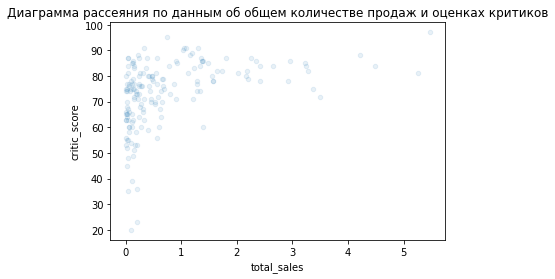

In [45]:
# Построение диаграммы рассеяния по данным об общем количестве продаж и оценках критиков
xone_data.plot(kind='scatter', x='total_sales', y='critic_score', alpha=0.1, title='Диаграмма рассеяния по данным об общем количестве продаж и оценках критиков')

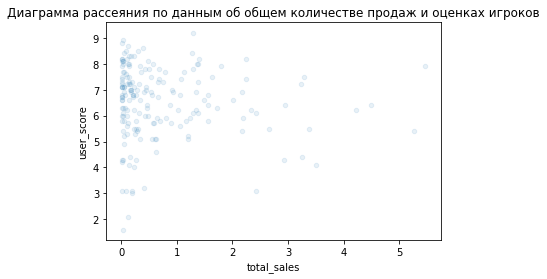

In [46]:
# Построение диаграммы рассеяния по данным об общем количестве продаж и оценках игроков
xone_data.plot(kind='scatter', x='total_sales', y='user_score', alpha=0.1, title='Диаграмма рассеяния по данным об общем количестве продаж и оценках игроков')

In [47]:
# Оценка корреляции между количеством проданных копий и оценками критиков
xone_data['total_sales'].corr(xone_data['critic_score'])

0.41699832800840175

In [48]:
# Оценка корреляции между количеством проданных копий и оценками пользователей
xone_data['total_sales'].corr(xone_data['user_score'])

-0.06892505328279412

##### Вывод

Корреляции и диаграммы рассеяния идентичны раннее рассмотренным.

**Оценка влияния на продажи внутри одной популярной платформы (3DS) отзывов пользователей и критиков**

In [49]:
ds3_data = actual_data.query('platform == "3DS"').reset_index()

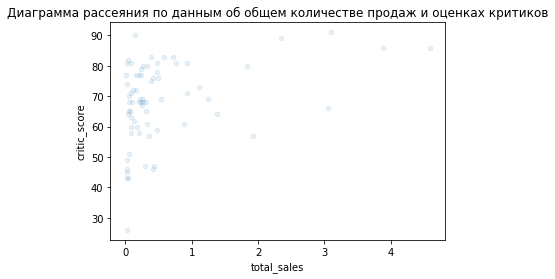

In [50]:
# Построение диаграммы рассеяния по данным об общем количестве продаж и оценках критиков
ds3_data.plot(kind='scatter', x='total_sales', y='critic_score', alpha=0.1, title='Диаграмма рассеяния по данным об общем количестве продаж и оценках критиков')

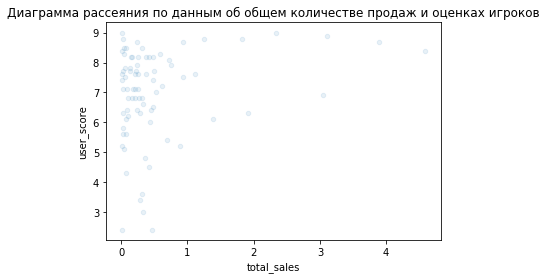

In [51]:
# Построение диаграммы рассеяния по данным об общем количестве продаж и оценках игроков
ds3_data.plot(kind='scatter', x='total_sales', y='user_score', alpha=0.1, title='Диаграмма рассеяния по данным об общем количестве продаж и оценках игроков')

In [52]:
# Оценим медианные значения оценок критиков и пользователей
ds3_data.pivot_table(index='platform', values=['critic_score', 'user_score'], aggfunc='median')

,critic_score,user_score
platform,,
3DS,69.0,7.3


In [53]:
# Оценка корреляции между количеством проданных копий и оценками критиков
ds3_data['total_sales'].corr(ds3_data['critic_score'])

0.35705661422881035

In [54]:
# Оценка корреляции между количеством проданных копий и оценками пользователей
ds3_data['total_sales'].corr(ds3_data['user_score'])

0.24150411773563016

##### Вывод

Корреляция между количеством продаж видеоигр и оценками критиков хоть и выше, чем корреляция между количеством продаж и оценками пользователей, но она не однозначна. Пользователям также свойственно ставить более высокие оценки мелкотиражным играм, чем критикам.

**Оценка влияния на продажи внутри одной популярной платформы (PC) отзывов пользователей и критиков**

In [55]:
pc_data = actual_data.query('platform == "PC"').reset_index()

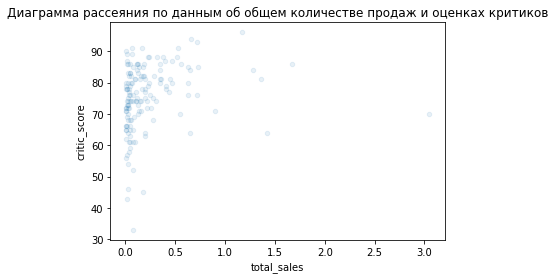

In [56]:
# Построение диаграммы рассеяния по данным об общем количестве продаж и оценках критиков
pc_data.plot(kind='scatter', x='total_sales', y='critic_score', alpha=0.1, title='Диаграмма рассеяния по данным об общем количестве продаж и оценках критиков')

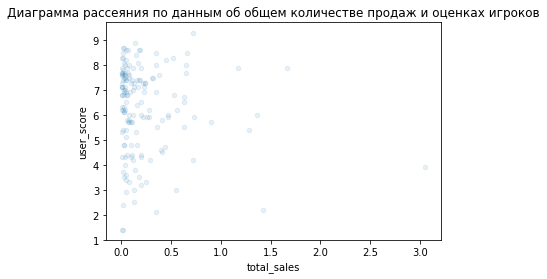

In [57]:
# Построение диаграммы рассеяния по данным об общем количестве продаж и оценках игроков
pc_data.plot(kind='scatter', x='total_sales', y='user_score', alpha=0.1, title='Диаграмма рассеяния по данным об общем количестве продаж и оценках игроков')

In [58]:
# Оценим медианные значения оценок критиков и пользователей
pc_data.pivot_table(index='platform', values=['critic_score', 'user_score'], aggfunc='median')

,critic_score,user_score
platform,,
PC,77.0,6.8


In [59]:
# Оценка корреляции между количеством проданных копий и оценками критиков
pc_data['total_sales'].corr(pc_data['critic_score'])

0.1996598483638018

In [60]:
# Оценка корреляции между количеством проданных копий и оценками пользователей
pc_data['total_sales'].corr(pc_data['user_score'])

-0.08999775678448749

##### Вывод

Корреляция между количеством продаж видеоигр и оценками критиков хоть и выше, чем корреляция между количеством продаж и оценками пользователей, но она не однозначна. Критикам свойственно ставить более высокие оценки мелкотиражным играм, чем пользователям.

**Общее распределение игр по жанрам**

In [61]:
temp_df = (actual_data
            .pivot_table(index='genre', values=['name', 'total_sales'],
                         aggfunc={'name': 'count', 'total_sales': ['sum', 'median', 'mean']})
)

In [62]:
temp_df.columns = ['total_games', 'total_sales_mean', 'total_sales_median', 'total_sales_sum']

In [63]:
temp_df.sort_values(by=['total_sales_sum', 'total_sales_mean'], ascending=False)

,total_games,total_sales_mean,total_sales_median,total_sales_sum
genre,,,,
Action,769,0.419376,0.110,322.50
Shooter,188,1.239415,0.445,233.01
Sports,214,0.703972,0.240,150.65
Role-Playing,292,0.499623,0.125,145.89
Misc,156,0.404231,0.105,63.06
Platform,74,0.576081,0.225,42.63
Racing,85,0.469294,0.120,39.89
Fighting,80,0.441375,0.125,35.31
Adventure,245,0.096490,0.030,23.64


##### Вывод

Самый массовый по количеству выпущенных игр и проданным копиям - жанр Action, однако в пересчете на количество проданных копий за игру он уступает жанрам  Shooter, Sports, Platform, и Role-Playing. Повышенные показатели средних значений проданных копий по сравнению с медианными значениями можно объяснить присутствием в жанрах бестселлеров. Низкими показателями количества проданных копий выделяется массовый по количеству выпущенных игр жанр Adventure.

### Шаг 4. Портрет пользователя каждого региона<a id='step4'></a>

**Портрет пользователя Северной Америки (NA)**

In [64]:
# Топ-5 популярных платформ жителей Северной Америки
na_platform_sales = (actual_data
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
)

In [65]:
# Оценим доли рынка платформ
na_platform_sales['share'] = na_platform_sales['na_sales'] / na_platform_sales['na_sales'].sum()

In [66]:
(na_platform_sales
    .sort_values(by='na_sales', ascending=False)
    .head(5)
)

,na_sales,share
platform,,
PS4,108.74,0.248384
XOne,93.12,0.212705
X360,81.66,0.186528
PS3,63.50,0.145047
3DS,38.20,0.087256


In [67]:
# Топ-5 популярных жанров жителей Северной Америки
(actual_data
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head(5)
)

,na_sales
genre,
Action,126.13
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [68]:
# Оценим количество проданных копий в зависмости от рейтинга ESRB в Северной Америке
(actual_data
    .pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)

,na_sales
rating,
M,165.29
unknown,89.42
E,79.05
E10+,54.24
T,49.79


**Портрет пользователя Европы (EU)**

In [69]:
# Топ-5 популярных платформ жителей Европы
eu_platform_sales = (actual_data
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
)

In [70]:
# Оценим доли рынка платформ
eu_platform_sales['share'] = eu_platform_sales['eu_sales'] / eu_platform_sales['eu_sales'].sum()

In [71]:
(eu_platform_sales
    .sort_values(by='eu_sales', ascending=False)
    .head(5)
)

,eu_sales,share
platform,,
PS4,141.09,0.359245
PS3,67.81,0.172659
XOne,51.59,0.131359
X360,42.55,0.108341
3DS,30.96,0.078831


In [72]:
# Топ-5 популярных жанров жителей Европы
(actual_data
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head(5)
)

,eu_sales
genre,
Action,118.61
Shooter,87.89
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [73]:
# Оценим количество проданных копий в зависмости от рейтинга ESRB в Европе
(actual_data
    .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)

,eu_sales
rating,
M,145.80
E,83.36
unknown,78.94
E10+,42.69
T,41.95


**Портрет пользователя Японии (JP)**

In [74]:
# Топ-5 популярных платформ жителей Японии
jp_platform_sales = (actual_data
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
)

In [75]:
# Оценим доли рынка платформ
jp_platform_sales['share'] = jp_platform_sales['jp_sales'] / jp_platform_sales['jp_sales'].sum()

In [76]:
(jp_platform_sales
    .sort_values(by='jp_sales', ascending=False)
    .head(5)
)

,jp_sales,share
platform,,
3DS,67.81,0.480854
PS3,23.35,0.165579
PSV,18.59,0.131825
PS4,15.96,0.113175
WiiU,10.88,0.077152


In [77]:
# Топ-5 популярных жанров жителей Японии
(actual_data
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head(5)
)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.44
Fighting,7.65
Shooter,6.61


In [78]:
# Оценим количество проданных копий в зависмости от рейтинга ESRB в Японии
(actual_data
    .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)

,jp_sales
rating,
unknown,85.29
T,20.59
E,15.14
M,14.11
E10+,5.89


##### Вывод

Лидирующие позиции среди игровых платформ в Северной Америке занимают PS4 (25%), Xbox One (21%), Xbox 360 (19%); в Европе безусловное лидерство закреплено за платформой PS4 (36%), а в Японии - за 3DS Nintendo (48%).

Топ-4 самых популярных жанров полностью разделяют жители Северной Америки и Европы (Action, Sports, Shooter, Role-Playing), при этом лидирующие позиции в Северной Америке разделяют жанры Action и Shooter, в Европе безусловное лидерство за жанром Action, на их фоне выделяются предпочтения жителей Японии, где на первом месте расположился жанр Role-Playing, что, вероятно, можно объяснить различиями в культурных традициях.

Наибольшее количество игр в Северной Америке и Европе продается с возрастным рейтингом M (for mature 17+), далее располагаются игры с возрастным рейтингом E (for everyone 6+). В Японии, вероятно, наиболее продаваемые игры маркируются системой, отличной от ESRB, однако на второй позиции располагаются игры с рейтингом T (for teens 13+).

На игры с рейтингом AO (for adults only 18+) накладываются самые серьезные ограничения на продажи со стороны ESRB (продажи во всех регионах отсутствуют за актуальный период).

### Шаг 5. Проверка гипотез<a id='step5'></a>

#### Гипотеза №1

Выборки пользовательских оценок платформы Xbox One и платформы PC - независимые. Требуется оценить отличие средних значений выборок, при этом не важно, в большую или меньшую сторону, исходя из чего формулируем двухстороннюю гипотезу:

**Нулевая гипотеза**: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Альтернативаня гипотеза**: средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Принимаемый уровень значимости: 5%.

In [79]:
# Создадим таблицу с данными о платформе PC
pc_data = actual_data.query('platform == "PC" & user_score.notna()').reset_index()

In [80]:
# Оценим характеристики столбца "user_score"
pc_data['user_score'].describe()

count    158.000000
mean       6.280380
std        1.735044
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [81]:
# Оценим дисперсию столбца "user_score"
pc_data['user_score'].var()

3.010376924937515

In [82]:
# Создадим таблицу с данными о платформе Xbox One
xone_data = actual_data.query('platform == "XOne" & user_score.notna()').reset_index()

In [83]:
# Оценим характеристики столбца "user_score"
xone_data['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [84]:
# Оценим дисперсию столбца "user_score"
xone_data['user_score'].var()

1.9069968429360695

In [85]:
# Оценим различие дисперсий двух выборок
pc_data['user_score'].var() / xone_data['user_score'].var()

1.578595652157792

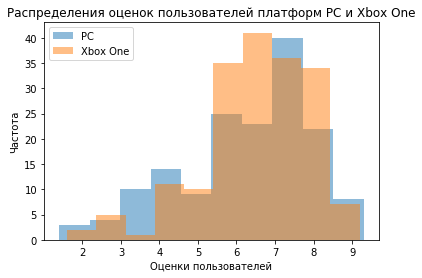

In [86]:
# Отобразим распределения оценок пользователей платформ PC и Xbox One
plt.hist(pc_data['user_score'], alpha=0.5)
plt.hist(xone_data['user_score'], alpha=0.5)
plt.title('Распределения оценок пользователей платформ PC и Xbox One')
plt.xlabel('Оценки пользователей')
plt.ylabel('Частота')
plt.legend(['PC', 'Xbox One'])
plt.show()

In [87]:
# Проверка гипотезы будет осуществляться при помощи метода ttest_ind (тест Стьюдента)
# с переданным ключевым словом equal_var=False, 
# поскольку дисперсии рассматриваемых выборок отличаются на 58%.

results = ttest_ind(
    pc_data['user_score'],
    xone_data['user_score'],
    equal_var=False
)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16174359801784308
Не получилось отвергнуть нулевую гипотезу


##### Вывод

Нулевая гипотеза принимается. Средние пользовательские рейтинги платформ Xbox One и PC отличаются случайно с вероятностью 16%

#### Гипотеза №2

Выборки пользовательских оценок платформы Xbox One и платформы PC - независимые. Требуется оценить отличие средних значений выборок, при этом не важно, в большую или меньшую сторону, исходя из чего формулируем двухстороннюю гипотезу:

**Нулевая гипотеза**: средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Альтернативаня гипотеза**: средние пользовательские рейтинги жанров Action и Sports отличаются.

Принимаемый уровень значимости: 5%.

In [88]:
# Создадим таблицу с данными о жанре Action
action_data = actual_data.query('genre == "Action" & user_score.notna()').reset_index()

In [89]:
# Оценим характеристики столбца "user_score"
action_data['user_score'].describe()

count    392.000000
mean       6.837500
std        1.329076
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [90]:
# Оценим дисперсию столбца "user_score"
action_data['user_score'].var()

1.7664418158567776

In [91]:
# Создадим таблицу с данными о жанре Sports
sports_data = actual_data.query('genre == "Sports" & user_score.notna()').reset_index()

In [92]:
# Оценим характеристики столбца "user_score"
sports_data['user_score'].describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

In [93]:
# Оценим дисперсию столбца "user_score"
sports_data['user_score'].var()

3.180612814465409

In [94]:
# Оценим различие дисперсий двух выборок
sports_data['user_score'].var() / action_data['user_score'].var()

1.80057604270578

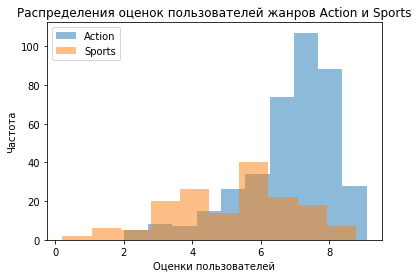

In [95]:
# Отобразим распределения оценок пользователей жанров Action и Sports
plt.hist(action_data['user_score'], alpha=0.5)
plt.hist(sports_data['user_score'], alpha=0.5)
plt.title('Распределения оценок пользователей жанров Action и Sports')
plt.xlabel('Оценки пользователей')
plt.ylabel('Частота')
plt.legend(['Action', 'Sports'])
plt.show()

In [96]:
# Проверка гипотезы будет осуществляться при помощи метода ttest_ind (тест Стьюдента)
# с переданным ключевым словом equal_var=False, 
# поскольку дисперсии рассматриваемых выборок отличаются на 80%.
results = ttest_ind(
    action_data['user_score'],
    sports_data['user_score'],
    equal_var=False
)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3883444596405356e-20
Отвергаем нулевую гипотезу


##### Вывод

Нулевая гипотеза отвергается. Средние пользовательские рейтинги жанров Action и Sports отличаются.

### Шаг 6. Общий вывод<a id='step6'></a>

Главная задача проекта: выявить определяющие успешность игры закономерности.

Проведенный анализ показал, что за актуальный наиболее успешные игры выпускаются в жанрах Action, Sports, Shooter и Role-Playing. При этом в Северной Америке лидирующие позиции разделяют жанры Action и Shooter, в Европе единоличное лидерство за жанром Action, в Японии доминирует жанр Role-Playing. Статистический анализ показал, что пользователи значительно лучше оценивают игры в жанре Action, хотя высокие оценки пользователей не коррелируют с числом продаж видеоигр.

Самыми перспективными платформами в 2017м году окажутся PS4, Xbox One, PC и Nintendo 3DS. При этом в Северной Америке топ платформ разделяют PS4 (25% рынка) и Xbox One (21% рынка), в Европе безусловное лидерство за платформой PS4 (36% рынка), а в Японии - за 3DS Nintendo (48%). Статистический анализ показал, что пользователи платформ Xbox One и PC одинаково хорошо оценивают игры на данных платформах, хотя высокие оценки пользователей не коррелируют с числом продаж видеоигр.

Касательно возрастных рейтингов: наибольшее количество игр в Северной Америке и Европе продается с возрастным рейтингом M (for mature 17+), далее располагаются игры с возрастным рейтингом E (for everyone 6+), в Японии же наиболее популярные игры по рейтингу ESRB занимают игры с рейтингом T (for teens 13+).

Эти выводы стоит учесть маркетологам интернет-магазина "Стримчик" в своих рекламных кампаниях в разных регионах в 2017м году.